In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

In [2]:
data = load_svmlight_file('data/train.txt')
X,y=data[0],data[1]

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [6]:
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,oob_score=True,verbose=1)

In [7]:
params=[{'max_depth':range(10,21,3)},]
gscv=GridSearchCV(rfc,param_grid=params,cv=5,scoring='precision',verbose=1)

In [8]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': range(10, 21, 3)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

In [9]:
gscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [10]:
gscv.best_estimator_.oob_score_

0.681617770939758

In [11]:
y_train_pred=gscv.best_estimator_.predict(X_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.7s finished


In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [13]:
print(precision_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.6947379329511572


array([[147488,  26023],
       [ 64805,  76265]])

In [15]:
y_test_pred=gscv.best_estimator_.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [16]:
print(precision_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.6777121217067676


array([[62277, 12502],
       [29616, 30426]])

In [23]:
rfc = RandomForestClassifier(max_depth=30,n_jobs=-1,oob_score=True,verbose=1)
params=[{'n_estimators':range(100,501,100)},]
gscv=GridSearchCV(rfc,param_grid=params,cv=5,scoring='precision',verbose=1)

In [25]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.5min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.5min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 22.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    6.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 21.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tas

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': range(100, 501, 100)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

In [19]:
gscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [18]:
X.shape

(449402, 6785)

In [29]:
predict_data = load_svmlight_file('data/predict.txt')
X,y=predict_data[0],predict_data[1]

In [30]:
X.shape

(268997, 6785)

In [31]:
y_pred=gscv.best_estimator_.predict(X)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [32]:
np.unique(y_pred,return_counts=True)

(array([1., 2.]), array([228682,  40315]))

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(penalty='l2')

In [35]:
lr.fit(X_train,y_train)

/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_train_pred=lr.predict(X_train)

In [37]:
precision_score(y_train,y_train_pred)

0.6670106997443424

In [38]:
confusion_matrix(y_train,y_train_pred)

array([[140886,  32625],
       [ 70334,  70736]])

In [40]:
y_pred=lr.predict(X)

In [41]:
np.unique(y_pred,return_counts=True)

(array([1., 2.]), array([241842,  27155]))

In [42]:
gscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [43]:
gscv.best_estimator_.feature_importances_

array([7.39366046e-06, 7.52319746e-04, 3.76685857e-05, ...,
       5.24851159e-05, 4.40262698e-03, 4.39250602e-05])

In [45]:
np.sort(lr.coef_)

array([[-0.04188338, -0.03094245, -0.03073728, ...,  0.02543767,
         0.0325417 ,  0.034737  ]])

In [46]:
y_pred_proba=lr.predict_proba(X)

In [53]:
posi=y_pred_proba[:,0]
posi[posi>.512].shape

(132468,)

In [54]:
posi[posi<.512].shape

(136529,)

In [55]:
y_train_pred_prob=lr.predict_proba(X_train)

In [59]:
train_posi=y_train_pred_prob[:,0]
train_posi[train_posi>.51].shape

(158834,)

In [60]:
train_posi[train_posi<=.51].shape

(155747,)

In [72]:
dur_data = pd.read_csv('data/duration.txt',sep='\s')
dur_data.head()
dur_data.columns=['label','dur']

/Users/Goleo8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
import seaborn as sns

In [74]:
new_df = dur_data[dur_data['dur']<500]

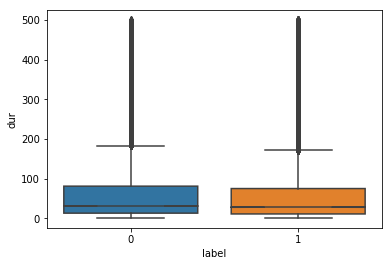

In [78]:
sns.boxplot(new_df['label'],new_df['dur'],notch=True)

In [77]:
sns.boxplot?